Linear Algebra Docs: https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/ (very extensive)

In [1]:
using LinearAlgebra

In [2]:
A = [1 2 3; 4 1 6; 7 8 1]

3×3 Array{Int64,2}:
 1  2  3
 4  1  6
 7  8  1

In [3]:
tr(A)

3

In [4]:
det(A)

104.0

In [6]:
A[1,1]*det(A[2:3,2:3]) - A[1,2]*det(A[2:3,[1,3]]) + A[1,3]*det(A[2:3,1:2])

104.0

Above we computed the determinant using the first row.

**Exercise:** Compute the det using the first column

In [7]:
Ai = inv(A)

3×3 Array{Float64,2}:
 -0.451923   0.211538    0.0865385
  0.365385  -0.192308    0.0576923
  0.240385   0.0576923  -0.0673077

In [8]:
inv(Ai)

3×3 Array{Float64,2}:
 1.0  2.0  3.0
 4.0  1.0  6.0
 7.0  8.0  1.0

**Exercise:**

Consider matrix equation:
$$
C x + (x^T D)^T = x + b
$$
with

In [9]:
C = [1 2;
     3 4]

D = [-1 0;
     2  1]

b = [1;
     2];

Find $x$.

**Solution:**

$$
C x + D^T x - I x =  b
$$

$$
(C + D^T - I\big) x =  b
$$

In [10]:
A = C + D' - I

2×2 Array{Int64,2}:
 -1  4
  3  4

In [11]:
xSol = A \ b

2-element Array{Float64,1}:
 0.25
 0.3125

In [12]:
#check
LHS = C*xSol + (xSol'*D)'

2-element Array{Float64,1}:
 1.25
 2.3125

In [13]:
RHS = xSol + b

2-element Array{Float64,1}:
 1.25
 2.3125

In [14]:
u = fill(1,5)
v = 1:5;
dot(u,v), u'*v

(15, 15)

In [18]:
A = reshape(collect(1:21),3,7)

3×7 Array{Int64,2}:
 1  4  7  10  13  16  19
 2  5  8  11  14  17  20
 3  6  9  12  15  18  21

In [19]:
rank(A)

2

In [23]:
using Pkg
Pkg.add("RowEchelon")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %Fetching: [=======>                                 ]  15.1 %                           ]  32.4 %Fetching: [====================>                    ]  49.9 %             ]  67.3 %Fetching: [============================>            ]  68.5 %Fetching: [====================================>    ]  89.0 %

  Resolving package versions...
  Installed RowEchelon ─ v0.2.0
   Updating `~/.julia/environments/v1.4/Project.toml`
  [af85af4c] + RowEchelon v0.2.0
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [af85af4c] + RowEchelon v0.2.0


In [24]:
using RowEchelon

┌ Info: Precompiling RowEchelon [af85af4c-bcd5-5d23-b03a-a909639aa875]
└ @ Base loading.jl:1260


In [25]:
rref(A)

3×7 Array{Float64,2}:
 1.0  0.0  -1.0  -2.0  -3.0  -4.0  -5.0
 0.0  1.0   2.0   3.0   4.0   5.0   6.0
 0.0  0.0   0.0   0.0   0.0   0.0   0.0

We thus see that columns 3:7 are linear combinations of the first two columns.

In [26]:
x3 = A[:,1:2] \ A[:,3]

2-element Array{Float64,1}:
 -1.0000000000000053
  2.000000000000003

In [27]:
x4 = A[:,1:2] \ A[:,4]

2-element Array{Float64,1}:
 -2.0000000000000084
  3.000000000000005

In [28]:
x5 = A[:,1:2] \ A[:,5]

2-element Array{Float64,1}:
 -3.000000000000012
  4.000000000000007

In [29]:
x6 = A[:,1:2] \ A[:,6]

2-element Array{Float64,1}:
 -4.0000000000000115
  5.000000000000007

In [30]:
x7 = A[:,1:2] \ A[:,7]

2-element Array{Float64,1}:
 -5.000000000000008
  6.0000000000000036

In [31]:
A[:,1:2]*x3

3-element Array{Float64,1}:
 7.000000000000007
 8.000000000000005
 9.000000000000002

In [32]:
A[:,1:2]*x4

3-element Array{Float64,1}:
 10.00000000000001
 11.000000000000007
 12.000000000000004

In [ ]:
#try it for the other cols

In [33]:
rank(A)

2

In [34]:
v = -ones(3)

3-element Array{Float64,1}:
 -1.0
 -1.0
 -1.0

In [35]:
norm(v)

1.7320508075688772

In [36]:
sqrt(3)

1.7320508075688772

In [37]:
norm(v,1)

3.0

In [38]:
norm(v,Inf)

1.0

In [39]:
norm([1,2,-8,3],Inf)

8.0

In [65]:
v = normalize(ones(3))

3-element Array{Float64,1}:
 0.5773502691896258
 0.5773502691896258
 0.5773502691896258

In [40]:
norm(v)

1.7320508075688772

In [1]:
using Plots, Distributions
N = 300
data = zeros(2,N)
normData = zeros(2,N)
for i in 1:N
    x = rand(Uniform(-3,3),2)
    data[:,i] = x
    normData[:,i] = x/norm(x)
end

scatter(data[1,:],data[2,:],legend = false, c = :black)
for i in 1:N
    plot!([0,data[1,i]],[0,data[2,i]], c= :green)
end
scatter!(normData[1,:],normData[2,:], c= :red,size=(400,400))

UndefVarError: UndefVarError: norm not defined

From [SWJ] Chapter 8:

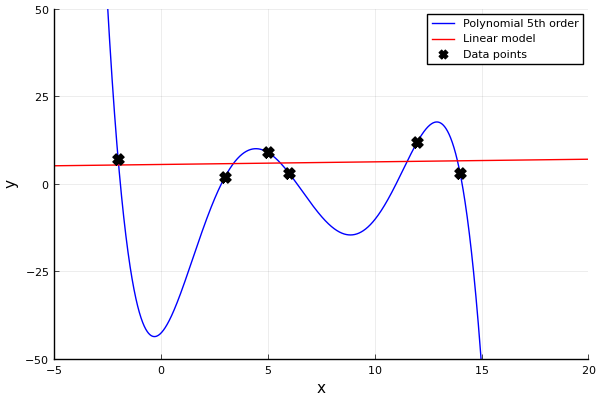

In [42]:
using Plots; pyplot()

xVals = [-2,3,5,6,12,14]
yVals = [7,2,9,3,12,3]
n = length(xVals)

V = [xVals[i+1]^(j) for i in 0:n-1, j in 0:n-1] #Vandermonde matrix - explain
c = V \ yVals
xGrid = -5:0.01:20
f1(x) = c'*[x^i for i in 0:n-1]

beta0, beta1 = 5.525, 0.075  #obtained via least squares... 
f2(x) = beta0 + beta1*x

plot(xGrid,f1.(xGrid), c=:blue, label="Polynomial 5th order")
plot!(xGrid,f2.(xGrid),c=:red, label="Linear model")
scatter!(xVals,yVals,
	c=:black, shape=:xcross, ms=8, 
	label="Data points", xlims=(-5,20), ylims=(-50,50),
    	xlabel = "x", ylabel = "y")

In [43]:
A = [ones(n) xVals]
beta0, beta1 = pinv(A)*yVals

2-element Array{Float64,1}:
 5.525
 0.07499999999999993

### Random integer matrices

In [44]:
rm() = rand([1,2,3],3,3)

rm (generic function with 1 method)

In [45]:
rm()

3×3 Array{Int64,2}:
 1  2  3
 2  1  2
 3  1  1

In [46]:
using StatsBase #may need install
mats = [rm() for _ in 1:10^5];
counts(rank.(mats),0:3)

4-element Array{Int64,1}:
     0
   273
 20013
 79714

In [47]:
sum(det.(mats) .== 0)

19997